In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

DEBUG = False
TRAIN_TEST_SEED = 42

In [65]:
df_churn = pd.read_csv("data/churn.csv")
print(df_churn.shape)
df_churn.head(1)

(3333, 20)


,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [66]:
df_states = pd.read_csv("data/states.csv")
print(df_states.shape)
df_states.head(1)

(52, 4)


,State,Latitude,Longitude,Name
0,AK,63.588753,-154.493062,Alaska


In [67]:
df_all = df_churn.merge(df_states, on="State", how="inner")
df_all.head(1)

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Latitude,Longitude,Name
0,KS,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,39.011902,-98.484246,Kansas


In [68]:
df_all.columns

Index(['State', 'Account_Length', 'Area_Code', 'Intl_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn',
       'Latitude', 'Longitude', 'Name'],
      dtype='object')

In [69]:
df_all.Churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

# Test - train split

In [70]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_all, stratify=df_all.Churn, test_size=.60, random_state=TRAIN_TEST_SEED)

## EDA

In [71]:
df = df_train

### Target (Churn)

In [72]:
df.Churn.value_counts(normalize=True)

0    0.855214
1    0.144786
Name: Churn, dtype: float64

 * Unbalanced -> need to be careful of the metric that our model uses.
 * Can build a model that has 85\% accuracy in two lines
 * Since cost of false-negative >> false-positive then accuracy is a poor metric for model evaluation.

In [73]:
df_train.columns

Index(['State', 'Account_Length', 'Area_Code', 'Intl_Plan', 'VMail_Plan',
       'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn',
       'Latitude', 'Longitude', 'Name'],
      dtype='object')

### Account_Length

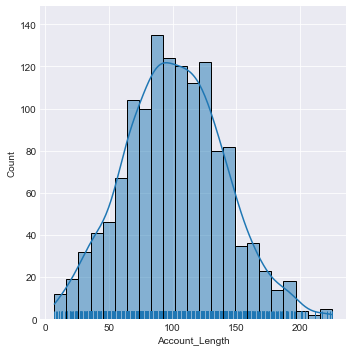

In [74]:
sns.displot(df.Account_Length, rug=True, kde=True);

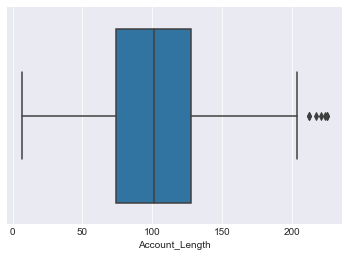

In [75]:
sns.boxplot(data=df, x="Account_Length");

 * Symmetric, appears to be normal
 * Some outliers to the right.

In [77]:
df.Area_Code.value_counts()

0    671
1    337
2    325
Name: Area_Code, dtype: int64